In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm


In [2]:
air_data = pd.read_excel('air_france.xls', sheet_name='DoubleClick')
subset =air_data[air_data['Total Volume of Bookings']==0]
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4142 entries, 368 to 4509
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher ID              4142 non-null   object 
 1   Publisher Name            4142 non-null   object 
 2   Keyword ID                4142 non-null   int64  
 3   Keyword                   4142 non-null   object 
 4   Match Type                4097 non-null   object 
 5   Campaign                  4142 non-null   object 
 6   Keyword Group             4142 non-null   object 
 7   Category                  4142 non-null   object 
 8   Bid Strategy              3031 non-null   object 
 9   Keyword Type              4142 non-null   object 
 10  Status                    4142 non-null   object 
 11  Search Engine Bid         4142 non-null   float64
 12  Clicks                    4142 non-null   int64  
 13  Click Charges             4142 non-null   float64
 14  Avg. C

In [3]:


air_data = air_data.rename(columns=lambda x: x.strip())
air_data.columns



Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings'],
      dtype='object')

In [4]:
pd.options.display.max_columns = None
air_data.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,Status,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,Live,6.25,1,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,Paused,6.25,1,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,Deactivated,0.00,1,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,Unavailable,7.50,59,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,Paused,0.25,8,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1


In [5]:
air_data['Match Type'].unique()

array(['Advanced', 'Broad', 'Exact', 'Standard', nan], dtype=object)

In [6]:
air_data.isnull().sum()

Publisher ID                   0
Publisher Name                 0
Keyword ID                     0
Keyword                        0
Match Type                    48
Campaign                       0
Keyword Group                  0
Category                       0
Bid Strategy                1224
Keyword Type                   0
Status                         0
Search Engine Bid              0
Clicks                         0
Click Charges                  0
Avg. Cost per Click            0
Impressions                    0
Engine Click Thru %            0
Avg. Pos.                      0
Trans. Conv. %                 0
Total Cost/ Trans.             0
Amount                         0
Total Cost                     0
Total Volume of Bookings       0
dtype: int64

In [7]:
air_data['Net Revenue'] = air_data['Amount']-air_data['Total Cost']
air_data['Average Revenue per Booking'] = air_data['Amount']/air_data['Total Volume of Bookings']
air_data['ROA'] = np.where(air_data['Total Cost'] == 0, 0, air_data['Net Revenue'] / air_data['Total Cost'])
air_data['Probability of Booking'] = air_data['Engine Click Thru %']*air_data['Trans. Conv. %']/10000

In [8]:
air_data.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,Status,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,Average Revenue per Booking,ROA,Probability of Booking
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,Live,6.25,1,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,975.327778,3794.870270,0.818182
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,Paused,6.25,1,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,1574.200000,2517.720000,0.166667
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,Deactivated,0.00,1,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,390.150000,1005.838710,0.111111
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,Unavailable,7.50,59,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,832.575000,719.064915,0.004988
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,Paused,0.25,8,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,935.000000,424.000000,0.003145


In [9]:
variables = ['Engine Click Thru %', 
'Trans. Conv. %', 'Net Revenue', 'Net Revenue', 'ROA', 'Average Revenue per Booking', 'Probability of Booking']

air_data[variables].describe(percentiles=[])

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Net Revenue,ROA,Average Revenue per Booking,Probability of Booking
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,368.000000,4510.000000
mean,11.141451,0.569255,866.207678,866.207678,3.414139,1024.259502,0.000681
std,20.234582,13.862485,14246.298903,14246.298903,72.779153,704.318741,0.015151
min,0.000000,0.000000,-8725.924987,-8725.924987,-1.000000,34.000000,0.000000
50%,4.105614,0.000000,-4.987500,-4.987500,-1.000000,899.725000,0.000000
max,200.000000,900.000000,549524.050273,549524.050273,3794.870270,5877.750000,0.818182


<AxesSubplot:xlabel='Average Revenue per Booking', ylabel='Count'>

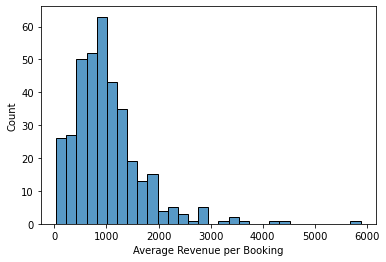

In [10]:
sns.histplot(air_data['Average Revenue per Booking'])

In [11]:
indepvar=sm.add_constant(air_data[['Engine Click Thru %', 
'Trans. Conv. %', 'Net Revenue', 'Net Revenue', 'ROA','Average Revenue per Booking',  'Probability of Booking']])


In [12]:
air_data.isna().sum()


Publisher ID                      0
Publisher Name                    0
Keyword ID                        0
Keyword                           0
Match Type                       48
Campaign                          0
Keyword Group                     0
Category                          0
Bid Strategy                   1224
Keyword Type                      0
Status                            0
Search Engine Bid                 0
Clicks                            0
Click Charges                     0
Avg. Cost per Click               0
Impressions                       0
Engine Click Thru %               0
Avg. Pos.                         0
Trans. Conv. %                    0
Total Cost/ Trans.                0
Amount                            0
Total Cost                        0
Total Volume of Bookings          0
Net Revenue                       0
Average Revenue per Booking    4142
ROA                               0
Probability of Booking            0
dtype: int64

In [13]:
subset =air_data[air_data['Total Volume of Bookings']==0]
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4142 entries, 368 to 4509
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Publisher ID                 4142 non-null   object 
 1   Publisher Name               4142 non-null   object 
 2   Keyword ID                   4142 non-null   int64  
 3   Keyword                      4142 non-null   object 
 4   Match Type                   4097 non-null   object 
 5   Campaign                     4142 non-null   object 
 6   Keyword Group                4142 non-null   object 
 7   Category                     4142 non-null   object 
 8   Bid Strategy                 3031 non-null   object 
 9   Keyword Type                 4142 non-null   object 
 10  Status                       4142 non-null   object 
 11  Search Engine Bid            4142 non-null   float64
 12  Clicks                       4142 non-null   int64  
 13  Click Charges   

In [14]:
air_data['Match Type code'] = air_data['Match Type'].astype('category').cat.codes


In [15]:
import numpy as np
import pandas as pd

null_or_inf = air_data.isnull().values.any() or np.isinf(air_data.select_dtypes(include=np.number)).values.any()

if null_or_inf:
    null_cols = air_data.columns[air_data.isnull().any()].tolist()
    inf_cols = air_data.select_dtypes(include=np.number).columns[np.isinf(air_data.select_dtypes(include=np.number)).any()].tolist()
    print("The following columns contain null values: ", null_cols)
    print("The following columns contain infinite values: ", inf_cols)
else:
    print("There are no null or infinite values in the air_data dataframe.")


The following columns contain null values:  ['Match Type', 'Bid Strategy', 'Average Revenue per Booking']
The following columns contain infinite values:  []


In [16]:

corr_matrix = air_data.corrwith(air_data['Total Cost'])

print(corr_matrix)


Keyword ID                    -0.031804
Search Engine Bid              0.113212
Clicks                         0.868330
Click Charges                  1.000000
Avg. Cost per Click            0.029171
Impressions                    0.431231
Engine Click Thru %           -0.027310
Avg. Pos.                     -0.018533
Trans. Conv. %                -0.000401
Total Cost/ Trans.             0.333614
Amount                         0.549963
Total Cost                     1.000000
Total Volume of Bookings       0.539573
Net Revenue                    0.482530
Average Revenue per Booking    0.084022
ROA                            0.003013
Probability of Booking        -0.000769
Match Type code                0.011831
dtype: float64


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns = ['Clicks', 'Search Engine Bid',  'Impressions', 'Probability of Booking']

subset_data = air_data[columns]

vif = pd.DataFrame()
vif["features"] = subset_data.columns
vif["VIF Factor"] = [variance_inflation_factor(subset_data.values, i) for i in range(subset_data.shape[1])]

print(vif)

# had to remove 'Average Revenue per Booking' bcz of null issue
# removed columns bcz vif : 'Amount', 'Total Volume of Bookings', 'Click Charges', 'Avg. Cost per Click'
# 'Total Cost/ Trans.'
# 'Engine Click Thru %', 'Trans. Conv. %', 'ROA',

                 features  VIF Factor
0                  Clicks    1.217602
1       Search Engine Bid    1.024952
2             Impressions    1.194267
3  Probability of Booking    1.001865


In [18]:
import statsmodels.api as sm

variables = ['Clicks', 'Search Engine Bid',  'Impressions', 'Engine Click Thru %'] 
# removed because of high p value : 'Search Engine Bid', 'Engine Click Thru %', 'Trans. Conv. %',
                                   #'Average Revenue per Booking', 'ROA', 'Probability of Booking'
    
indepvar = air_data[variables]

indepvar = sm.add_constant(indepvar)

model = sm.OLS(air_data['Total Cost'], indepvar)

results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     3622.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:26:02   Log-Likelihood:                -35636.
No. Observations:                4510   AIC:                         7.128e+04
Df Residuals:                    4505   BIC:                         7.131e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.8826    

In [19]:

grouped = air_data.groupby('Publisher Name').agg({
    'Net Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Volume of Bookings': 'sum',
    'Click Charges': 'sum',
    'Clicks': 'sum',
    'Amount': 'sum',
    'Impressions' : 'sum',
    'Engine Click Thru %' : 'mean',
    'Trans. Conv. %' : 'mean'
    
})

grouped['Cost/Booking'] = grouped['Total Cost'] / grouped['Total Volume of Bookings']
grouped['Avg. Cost per Click'] = grouped['Total Cost'] / grouped['Clicks']
grouped['ROA'] = round(grouped['Net Revenue'] / grouped['Total Cost']*100)
grouped['Probability of Booking'] = (grouped['Impressions']/grouped['Total Volume of Bookings'])/1000000
grouped['Average Revenue Per Booking'] = grouped['Amount'] / grouped['Total Volume of Bookings']


grouped = grouped.drop(['Total Cost', 'Clicks', 'Amount', 'Impressions'], axis=1)
grouped = grouped.reset_index()
grouped = grouped.rename(columns={
    'Net Revenue': 'Sum of Net Revenue',
    'Click Charges': 'Sum of Click Charges'
})

print(grouped)



      Publisher Name  Sum of Net Revenue  Total Volume of Bookings  \
0    Google - Global        8.086031e+05                       797   
1        Google - US        1.391841e+06                      1550   
2       MSN - Global        1.333639e+05                       129   
3           MSN - US        1.654513e+05                       140   
4  Overture - Global        3.657888e+05                       372   
5      Overture - US        2.054572e+05                       289   
6         Yahoo - US        8.360911e+05                       662   

   Sum of Click Charges  Engine Click Thru %  Trans. Conv. %  Cost/Booking  \
0         120946.711971             8.994485        0.432664    151.752462   
1         353640.598920            15.089745        0.414799    228.155225   
2          12160.362438             7.335605        1.133349     94.266375   
3          16098.487407             8.263521        0.731465    114.989196   
4          64295.862144             3.547863     

In [20]:

grouped = air_data.groupby('Campaign').agg({
    'Net Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Volume of Bookings': 'sum',
    'Click Charges': 'sum',
    'Clicks': 'sum',
    'Amount': 'sum',
    'Impressions' : 'sum',
    'Engine Click Thru %' : 'mean',
    'Trans. Conv. %' : 'mean'
    
})

grouped['Cost/Booking'] = grouped['Total Cost'] / grouped['Total Volume of Bookings']
grouped['Avg. Cost per Click'] = grouped['Total Cost'] / grouped['Clicks']
grouped['ROA'] = round(grouped['Net Revenue'] / grouped['Total Cost']*100)
grouped['Probability of Booking'] = (grouped['Impressions']/grouped['Total Volume of Bookings'])/1000000
grouped['Average Revenue Per Booking'] = grouped['Amount'] / grouped['Total Volume of Bookings']


grouped = grouped.drop(['Total Cost', 'Clicks', 'Amount', 'Impressions'], axis=1)
grouped = grouped.reset_index()
grouped = grouped.rename(columns={
    'Net Revenue': 'Sum of Net Revenue',
    'Click Charges': 'Sum of Click Charges'
})

print(grouped)


# checking which campaign should we discontinue

                                  Campaign  Sum of Net Revenue  \
0   Air France Brand & French Destinations        7.016274e+05   
1                       Air France Branded        2.206793e+06   
2               Air France Global Campaign        4.059225e+05   
3                           Business Class       -3.124550e+03   
4                      French Destinations       -2.208037e+03   
5                            General Terms        1.371475e+03   
6                     Geo Targeted Atlanta       -9.525000e+01   
7                      Geo Targeted Boston        1.482775e+03   
8                     Geo Targeted Chicago        5.562575e+03   
9                  Geo Targeted Cincinnati       -3.375000e+01   
10                         Geo Targeted DC        3.920438e+03   
11                    Geo Targeted Detroit        2.049250e+02   
12                    Geo Targeted Houston        5.072413e+03   
13                Geo Targeted Los Angeles        3.836625e+02   
14        

In [21]:
air_data['Google'] = air_data['Publisher Name'].apply(lambda x: 1 if x.find('Google') != -1 else 0)
air_data['Yahoo'] = air_data['Publisher Name'].apply(lambda x: 1 if x.find('Yahoo') != -1 else 0)
air_data['MSN'] = air_data['Publisher Name'].apply(lambda x: 1 if x.find('MSN') != -1 else 0)
air_data['Overture'] = air_data['Publisher Name'].apply(lambda x: 1 if x.find('Overture') != -1 else 0)



In [22]:
google_data = air_data[air_data['Publisher Name'].str.contains('Google')]
other_data = air_data[~air_data['Publisher Name'].str.contains('Google')]
google_revenue_mean = google_data['Net Revenue'].mean()
google_cost_mean = google_data['Total Cost'].mean()
other_revenue_mean = other_data['Net Revenue'].mean()
other_cost_mean = other_data['Total Cost'].mean()
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(google_data['Net Revenue'], other_data['Net Revenue'], equal_var=False)

if p_value < 0.05:
    print("The difference in mean Net Revenue between Google and Yahoo is statistically significant.")
else:
    print("There is no significant difference in mean Net Revenue between Google and others.")


There is no significant difference in mean Net Revenue between Google and others.


In [24]:
air_data['Words'] = air_data['Keyword'].str.split()

air_data_exploded = air_data.explode('Words')

roa_by_word = air_data_exploded.groupby('Words')['ROA'].mean()

roa_by_word_sorted = roa_by_word.sort_values(ascending=False)

# the top 10 words with the highest ROA
print(roa_by_word_sorted.head(10))


Words
[airfrance]            719.064915
airfrance,com          221.187302
airfrance.us           157.161453
france.com             142.729843
low                    131.564211
campaign::france       116.840914
phone                   96.580439
number                  96.580439
2006::google|europe     90.069514
online                  69.833333
Name: ROA, dtype: float64


In [25]:
air_data['Words'] = air_data['Keyword'].str.split()

air_data_exploded = air_data.explode('Words')

Impressions_by_word = air_data_exploded.groupby('Words')['Impressions'].sum()

Impressions_by_word_sorted = Impressions_by_word.sort_values(ascending=False)

# the top 10 words with the highest Impressions
print(Impressions_by_word_sorted.head(10))


Words
travel      14999768
france      11869598
ticket       9991947
airline      9691489
europe       4678345
paris        3864984
airfare      3619564
flight       3345986
vacation     2980732
to           2628500
Name: Impressions, dtype: int64


In [26]:
air_data['Words'] = air_data['Keyword'].str.split()

air_data_exploded = air_data.explode('Words')

Clicks_by_word = air_data_exploded.groupby('Words')['Clicks'].sum()

Clicks_by_word_sorted = Clicks_by_word.sort_values(ascending=False)

# the top 10 words with the highest Clicks
print(Clicks_by_word_sorted.head(10))


Words
france       128567
air           98036
to            83686
paris         73510
flight        68273
airfrance     63037
ticket        61215
airline       60973
france]       56281
[air          56281
Name: Clicks, dtype: int64
